In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree

## Get the Data 

In [2]:
#https://www.kaggle.com/uciml/iris

url_='https://drive.google.com/uc?id=10vsX925g8ff4QdgQpnsguo4DHUHOPgAL'
df = pd.read_csv(url_)

In [3]:
df.shape

(150, 6)

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
X = df.drop(['Id', 'Species'], axis = 1)
y = df['Species']

In [7]:
type(X) # DataFrame

pandas.core.frame.DataFrame

In [8]:
type(y) # Series

pandas.core.series.Series

In [9]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [11]:
set(y) ## labels

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

In [12]:
X.shape

(150, 4)

In [13]:
y.shape

(150,)

## Split data to Train and Test Sets

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) # 20%

In [15]:
(X_train.shape, y_train.shape)

((120, 4), (120,))

In [16]:
(X_test.shape, y_test.shape)

((30, 4), (30,))

### Decision Tree - create instance

In [17]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
model = DecisionTreeClassifier(criterion='gini')

### Decision Tree - train model

In [18]:
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### Decision Tree - make a prediction

In [19]:
y_pred = model.predict(X_test)
y_pred_s = pd.Series(y_pred)

In [20]:
type(y_pred)

numpy.ndarray

In [21]:
y_pred_s

0     Iris-versicolor
1         Iris-setosa
2     Iris-versicolor
3     Iris-versicolor
4      Iris-virginica
5         Iris-setosa
6      Iris-virginica
7         Iris-setosa
8     Iris-versicolor
9     Iris-versicolor
10        Iris-setosa
11     Iris-virginica
12     Iris-virginica
13    Iris-versicolor
14     Iris-virginica
15    Iris-versicolor
16        Iris-setosa
17    Iris-versicolor
18    Iris-versicolor
19     Iris-virginica
20        Iris-setosa
21        Iris-setosa
22        Iris-setosa
23     Iris-virginica
24        Iris-setosa
25    Iris-versicolor
26    Iris-versicolor
27        Iris-setosa
28    Iris-versicolor
29     Iris-virginica
dtype: object

In [22]:
type(y_test)

pandas.core.series.Series

In [23]:
# combine to view
s3 = pd.Series(list(zip(y_pred_s, y_test)))
s3

0     (Iris-versicolor, Iris-versicolor)
1             (Iris-setosa, Iris-setosa)
2     (Iris-versicolor, Iris-versicolor)
3     (Iris-versicolor, Iris-versicolor)
4       (Iris-virginica, Iris-virginica)
5             (Iris-setosa, Iris-setosa)
6       (Iris-virginica, Iris-virginica)
7             (Iris-setosa, Iris-setosa)
8     (Iris-versicolor, Iris-versicolor)
9     (Iris-versicolor, Iris-versicolor)
10            (Iris-setosa, Iris-setosa)
11      (Iris-virginica, Iris-virginica)
12      (Iris-virginica, Iris-virginica)
13    (Iris-versicolor, Iris-versicolor)
14     (Iris-virginica, Iris-versicolor)
15    (Iris-versicolor, Iris-versicolor)
16            (Iris-setosa, Iris-setosa)
17    (Iris-versicolor, Iris-versicolor)
18    (Iris-versicolor, Iris-versicolor)
19      (Iris-virginica, Iris-virginica)
20            (Iris-setosa, Iris-setosa)
21            (Iris-setosa, Iris-setosa)
22            (Iris-setosa, Iris-setosa)
23      (Iris-virginica, Iris-virginica)
24            (I

## Model Evaluation

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.88      1.00      0.93         7

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [26]:
print(confusion_matrix(y_test, y_pred))

[[10  0  0]
 [ 0 12  1]
 [ 0  0  7]]


## Visualization

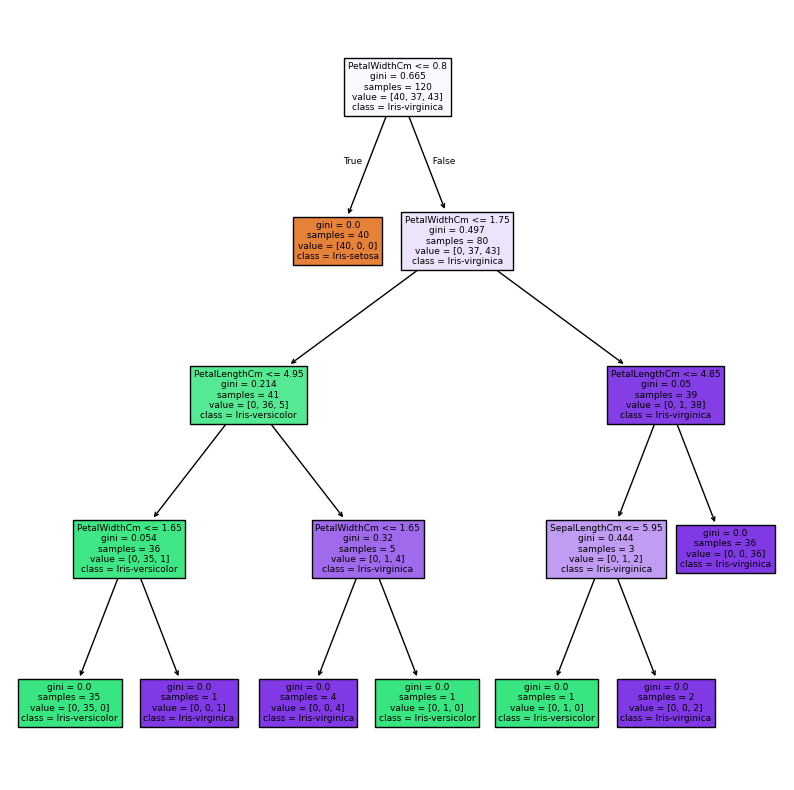

In [27]:
plt.figure(figsize = (10, 10))
plot_tree(model, feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], 
          class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], filled = True)
plt.show()